In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the imputed dataset
data = pd.read_csv("E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train.csv")

# Display the first few rows
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
data['Previous Claims'].value_counts()

Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
data.describe(include="all")

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
count,1.200000e+06,1.181295e+06,1200000,1.155051e+06,1181471,1.090328e+06,1200000,841925,1.125924e+06,1200000,...,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1200000,1122176,1200000,1200000,1200000,1.200000e+06
unique,NaN,NaN,2,NaN,3,NaN,4,3,NaN,3,...,NaN,NaN,NaN,NaN,167381,3,2,4,3,NaN
top,NaN,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,...,NaN,NaN,NaN,NaN,2020-02-08 15:21:39.134960,Average,Yes,Weekly,House,NaN
freq,NaN,NaN,602571,NaN,395391,NaN,303818,282750,NaN,401542,...,NaN,NaN,NaN,NaN,142,377905,601873,306179,400349,NaN
mean,5.999995e+05,4.114556e+01,NaN,3.274522e+04,NaN,2.009934e+00,NaN,NaN,2.561391e+01,NaN,...,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,NaN,NaN,NaN,NaN,NaN,1.102545e+03
std,3.464103e+05,1.353995e+01,NaN,3.217951e+04,NaN,1.417338e+00,NaN,NaN,1.220346e+01,NaN,...,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,NaN,NaN,NaN,NaN,NaN,8.649989e+02
min,0.000000e+00,1.800000e+01,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,2.012237e+00,NaN,...,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,2.000000e+01
25%,2.999998e+05,3.000000e+01,NaN,8.001000e+03,NaN,1.000000e+00,NaN,NaN,1.591896e+01,NaN,...,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,NaN,NaN,NaN,NaN,NaN,5.140000e+02
50%,5.999995e+05,4.100000e+01,NaN,2.391100e+04,NaN,2.000000e+00,NaN,NaN,2.457865e+01,NaN,...,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,NaN,NaN,NaN,NaN,NaN,8.720000e+02
75%,8.999992e+05,5.300000e+01,NaN,4.463400e+04,NaN,3.000000e+00,NaN,NaN,3.452721e+01,NaN,...,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,NaN,NaN,NaN,NaN,NaN,1.509000e+03


In [6]:
# Convert Policy Start Date to datetime
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
numerical_features,categorical_features=[],[]
for i in data.columns.to_list():
      if data[i].dtype == 'object':
        categorical_features.append(i)
      else:
        numerical_features.append(i)

print("===========")
print("Numerical columns List:- ",numerical_features,len(numerical_features),sep="\n")
print("===========")
print("Categorical columns List:- ",categorical_features,len(categorical_features),sep="\n")


Numerical columns List:- 
['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Premium Amount']
11
Categorical columns List:- 
['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
10


## --- Univariate Analysis ---

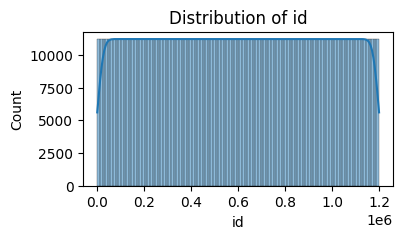

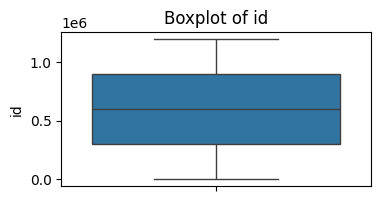

Summary Statistics for id:
count    1.200000e+06
mean     5.999995e+05
std      3.464103e+05
min      0.000000e+00
25%      2.999998e+05
50%      5.999995e+05
75%      8.999992e+05
max      1.199999e+06
Name: id, dtype: float64



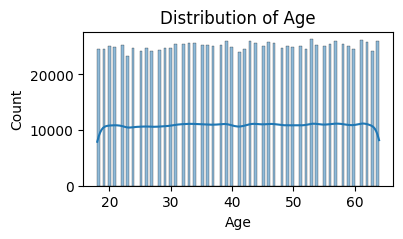

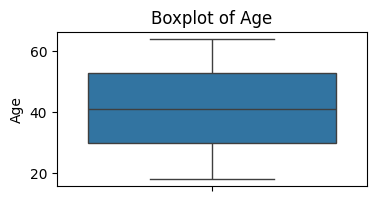

Summary Statistics for Age:
count    1.181295e+06
mean     4.114556e+01
std      1.353995e+01
min      1.800000e+01
25%      3.000000e+01
50%      4.100000e+01
75%      5.300000e+01
max      6.400000e+01
Name: Age, dtype: float64



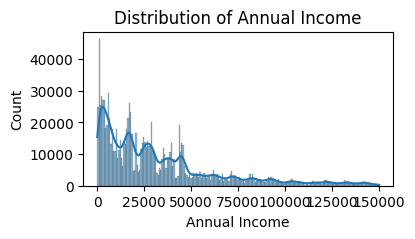

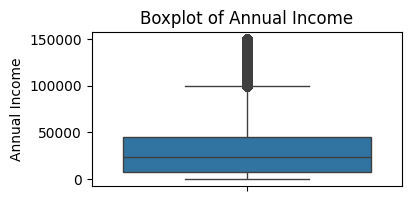

Summary Statistics for Annual Income:
count    1.155051e+06
mean     3.274522e+04
std      3.217951e+04
min      1.000000e+00
25%      8.001000e+03
50%      2.391100e+04
75%      4.463400e+04
max      1.499970e+05
Name: Annual Income, dtype: float64



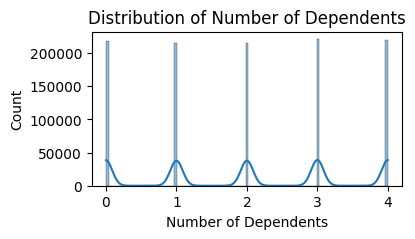

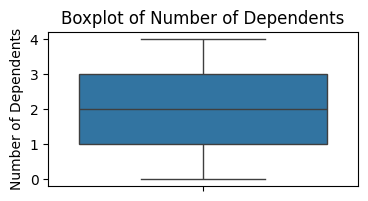

Summary Statistics for Number of Dependents:
count    1.090328e+06
mean     2.009934e+00
std      1.417338e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: Number of Dependents, dtype: float64



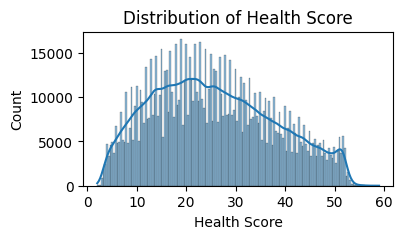

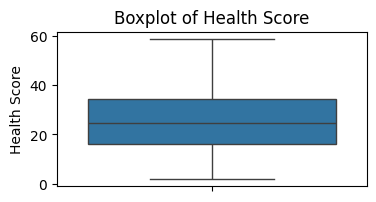

Summary Statistics for Health Score:
count    1.125924e+06
mean     2.561391e+01
std      1.220346e+01
min      2.012237e+00
25%      1.591896e+01
50%      2.457865e+01
75%      3.452721e+01
max      5.897591e+01
Name: Health Score, dtype: float64



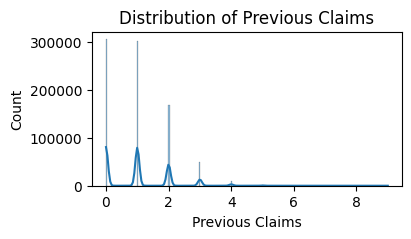

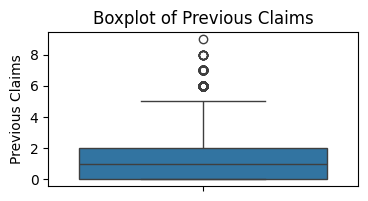

Summary Statistics for Previous Claims:
count    835971.000000
mean          1.002689
std           0.982840
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: Previous Claims, dtype: float64



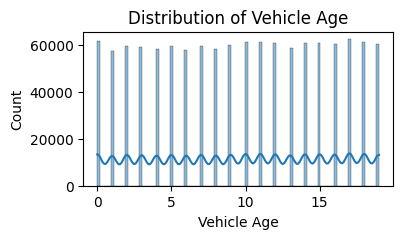

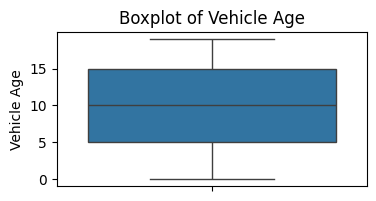

Summary Statistics for Vehicle Age:
count    1.199994e+06
mean     9.569889e+00
std      5.776189e+00
min      0.000000e+00
25%      5.000000e+00
50%      1.000000e+01
75%      1.500000e+01
max      1.900000e+01
Name: Vehicle Age, dtype: float64



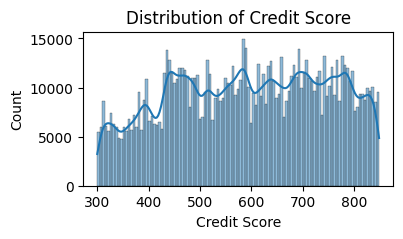

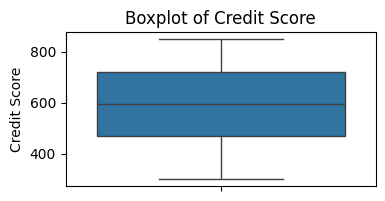

Summary Statistics for Credit Score:
count    1.062118e+06
mean     5.929244e+02
std      1.499819e+02
min      3.000000e+02
25%      4.680000e+02
50%      5.950000e+02
75%      7.210000e+02
max      8.490000e+02
Name: Credit Score, dtype: float64



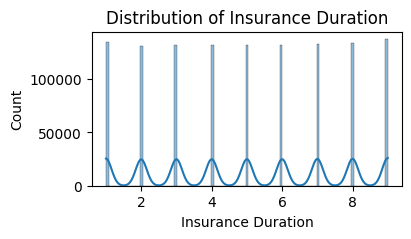

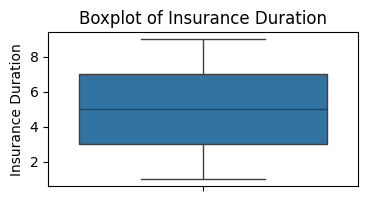

Summary Statistics for Insurance Duration:
count    1.199999e+06
mean     5.018219e+00
std      2.594331e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      9.000000e+00
Name: Insurance Duration, dtype: float64



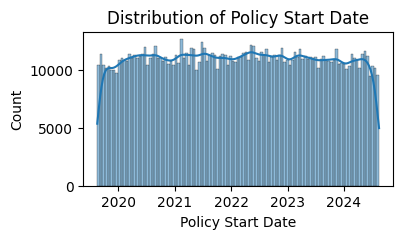

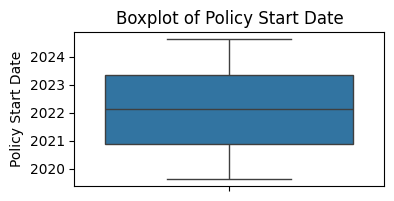

Summary Statistics for Policy Start Date:
count                          1200000
mean     2022-02-13 05:06:30.972380672
min         2019-08-17 15:21:39.080371
25%      2020-11-20 15:21:39.121168896
50%      2022-02-14 15:21:39.151731968
75%      2023-05-06 15:21:39.182597120
max         2024-08-15 15:21:39.287115
Name: Policy Start Date, dtype: object



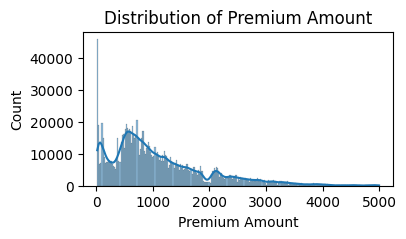

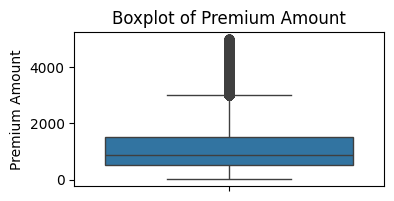

Summary Statistics for Premium Amount:
count    1.200000e+06
mean     1.102545e+03
std      8.649989e+02
min      2.000000e+01
25%      5.140000e+02
50%      8.720000e+02
75%      1.509000e+03
max      4.999000e+03
Name: Premium Amount, dtype: float64



In [10]:
# Numerical Variables
for col in numerical_features:
    plt.figure(figsize=(4,2))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(4,2))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    print(f"Summary Statistics for {col}:\n{data[col].describe()}\n")

In [11]:
for i in ['Previous Claims','Number of Dependents','Insurance Duration','Vehicle Age']:
    numerical_features.remove(i)
    categorical_features.append(i)

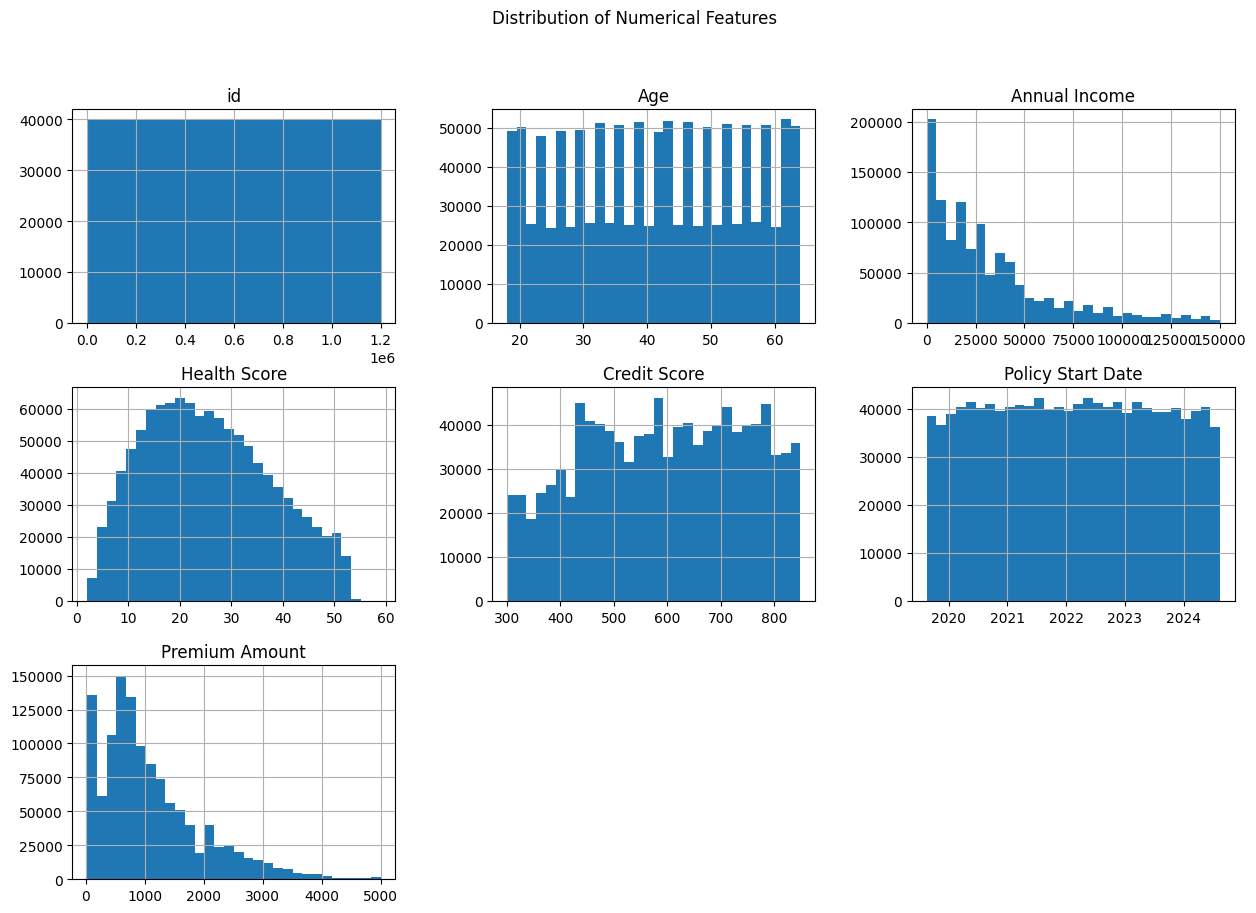

In [12]:
# Plot histograms for numerical features
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

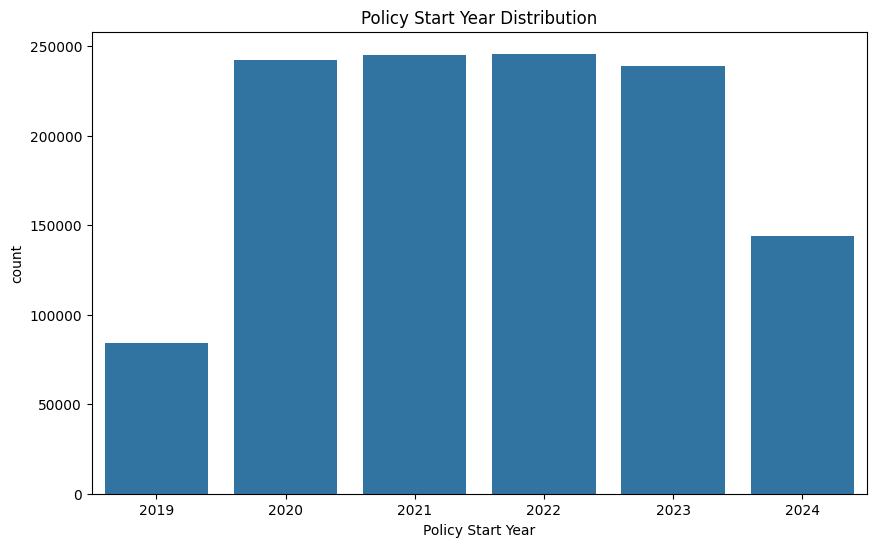

In [13]:
data['Policy Start Year'] = data['Policy Start Date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='Policy Start Year', data=data)
plt.title('Policy Start Year Distribution')
plt.show()

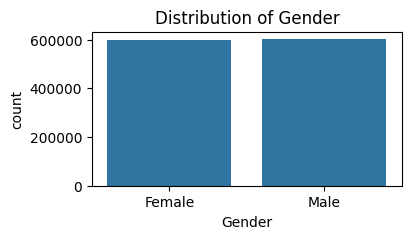

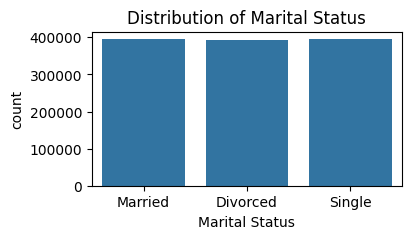

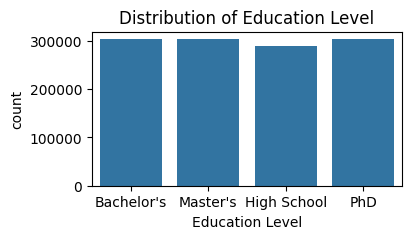

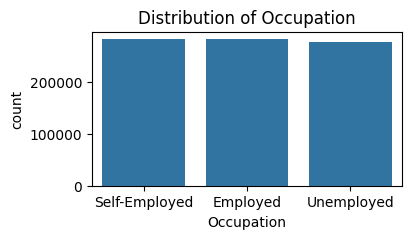

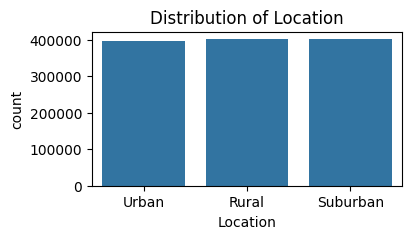

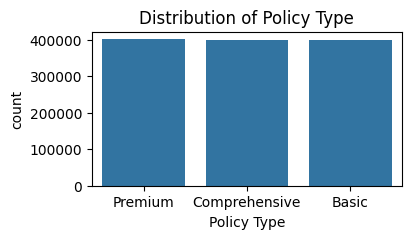

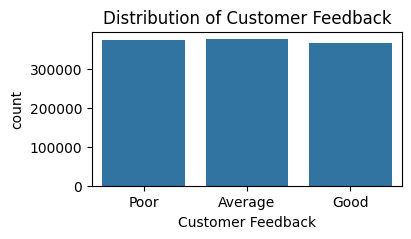

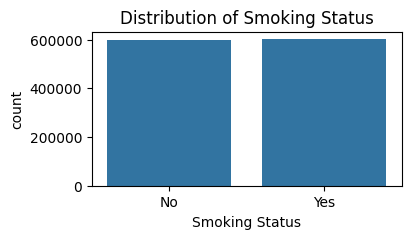

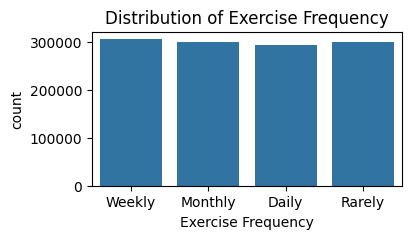

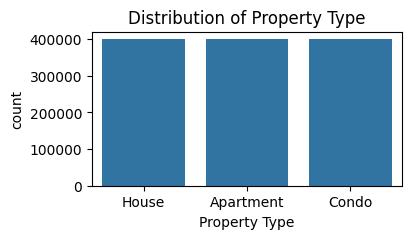

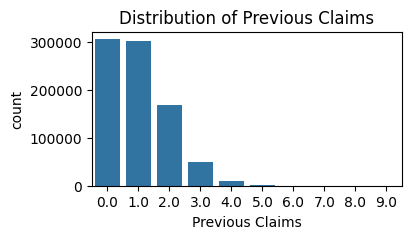

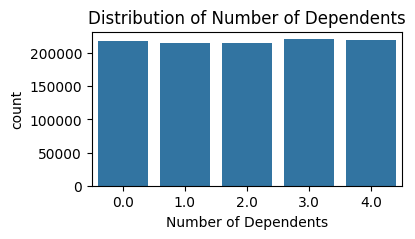

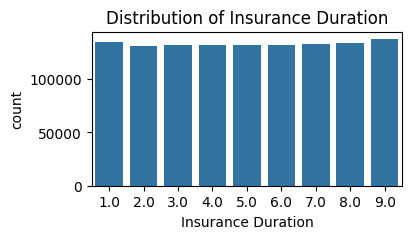

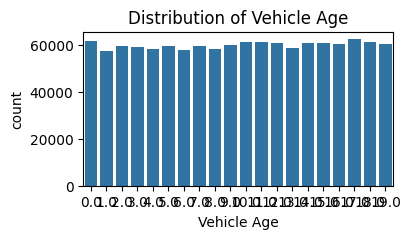

In [9]:
for feature in categorical_features:
    plt.figure(figsize=(4,2))
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
    plt.show()

#### Outliers

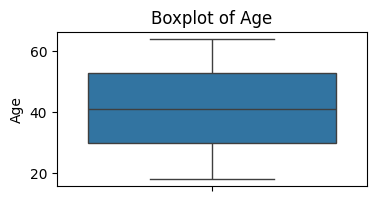

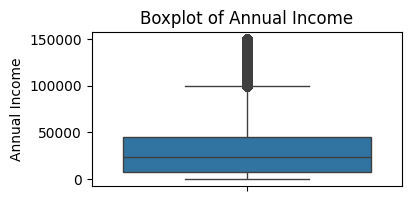

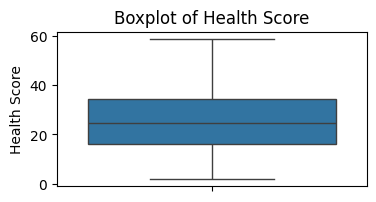

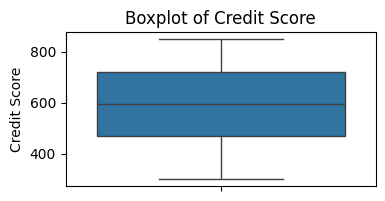

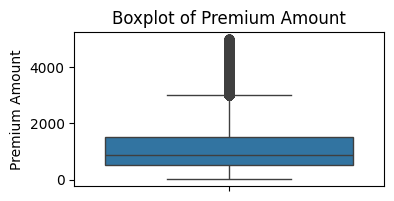

In [10]:
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

#### Correlations

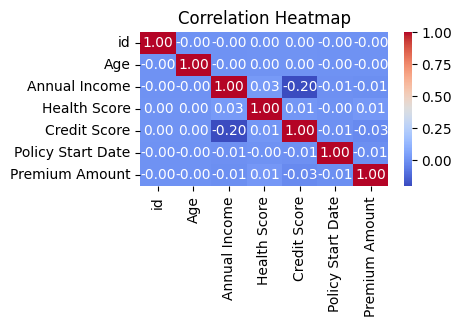

In [14]:
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(4,2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Correlation with target variable
corr_matrix=data[numerical_features].corr()
print(corr_matrix['Premium Amount'].sort_values(ascending=False))

Premium Amount    1.000000
Health Score      0.014704
Age              -0.002430
Annual Income    -0.012390
Credit Score     -0.026014
Name: Premium Amount, dtype: float64


categorical vs numerical

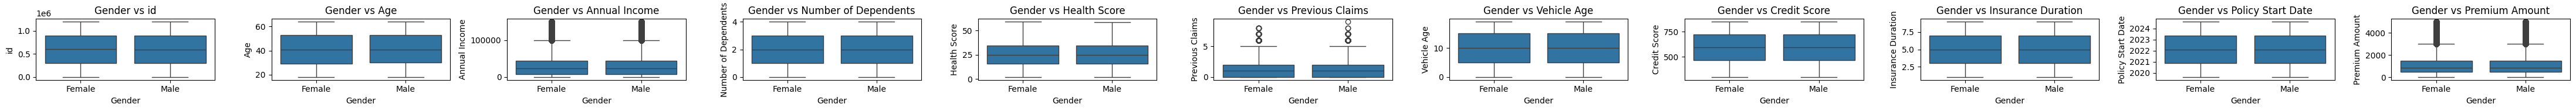

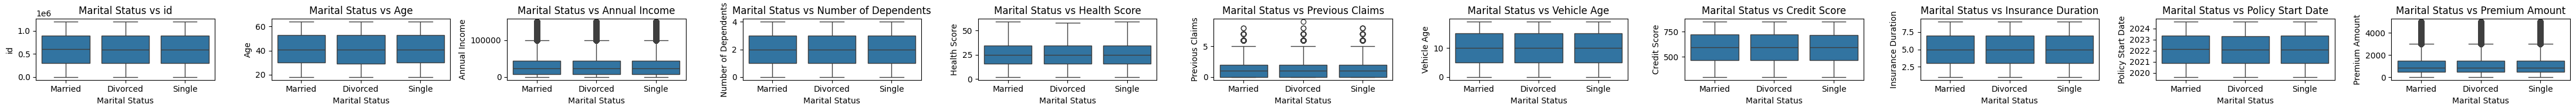

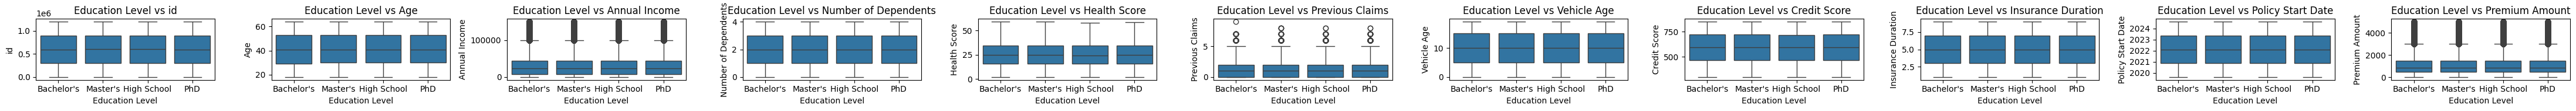

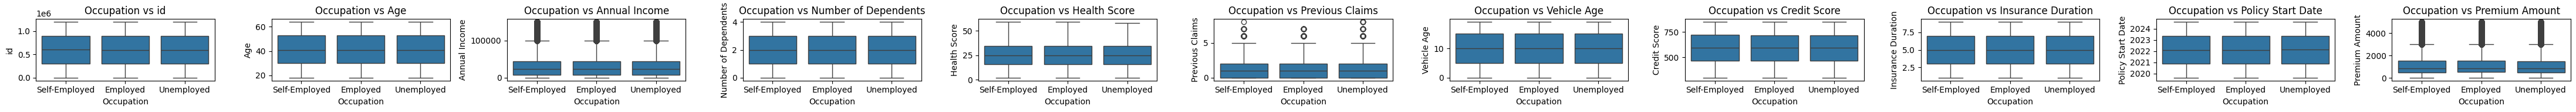

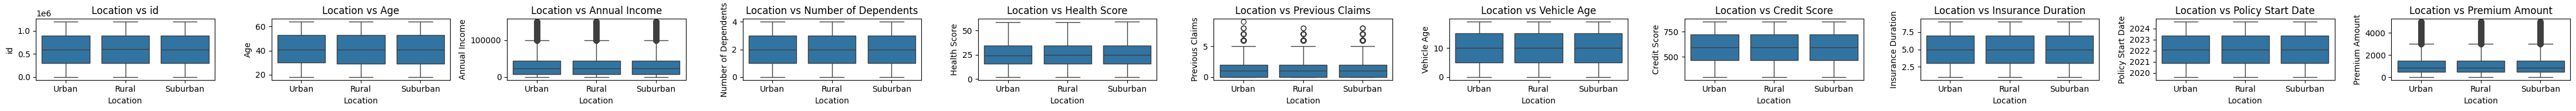

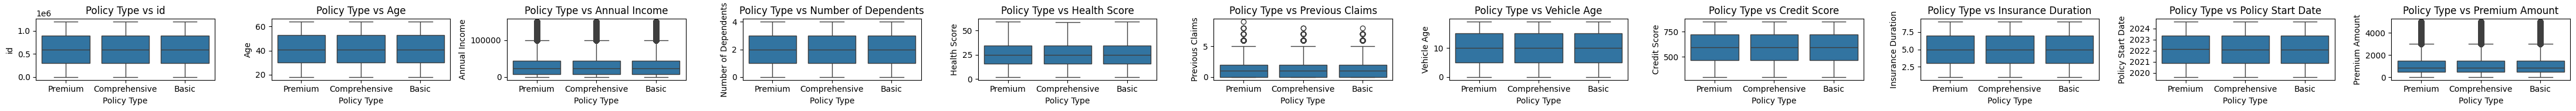

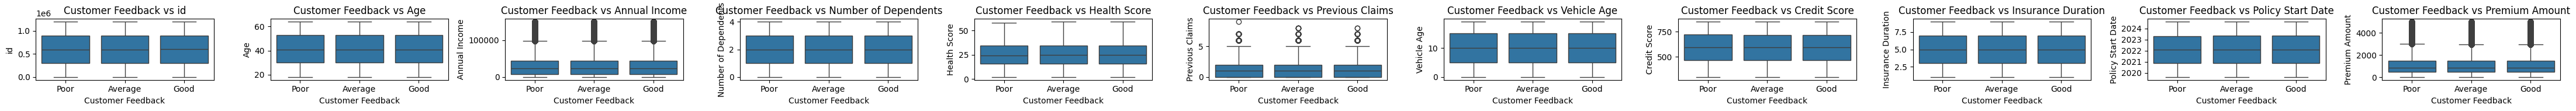

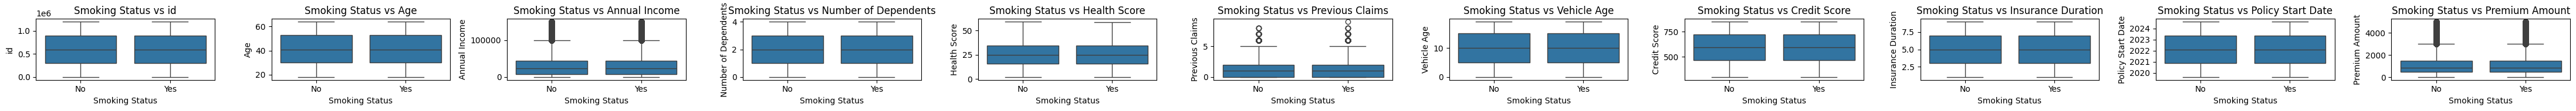

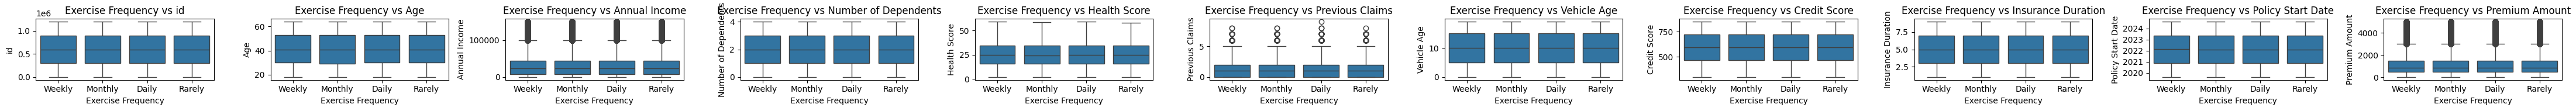

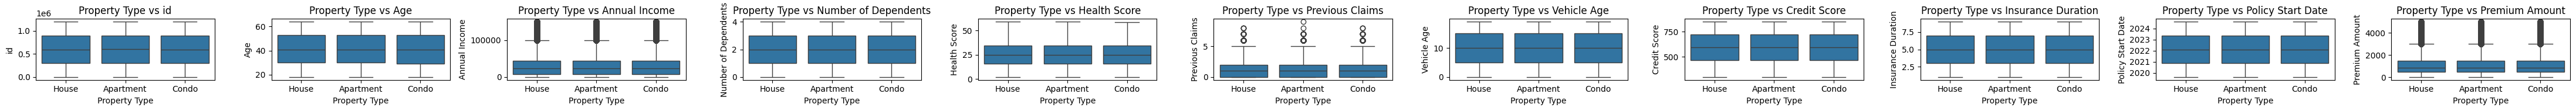

In [8]:
for cat_col in categorical_features:
    if data[cat_col].nunique() < 10:  # Avoid very large plots
        num_plots = len(numerical_features)
        fig, axes = plt.subplots(1, num_plots, figsize=(4 * num_plots, 2))

        for i, num_col in enumerate(numerical_features):
            sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[i])
            axes[i].set_title(f'{cat_col} vs {num_col}')

        plt.tight_layout()
        plt.show()

e:\AI engineer\Guvi\Capstone Projects\Project3\fresh_clone\SmartPremium\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


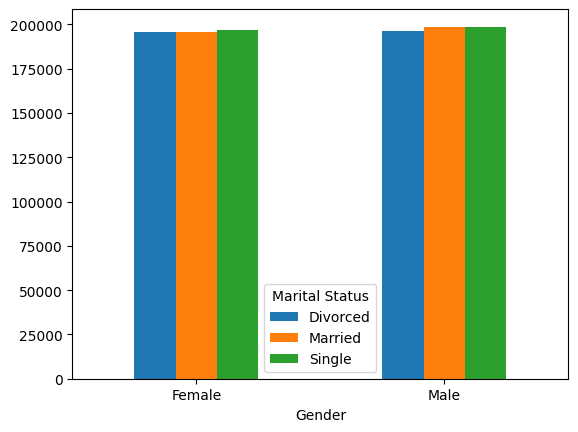

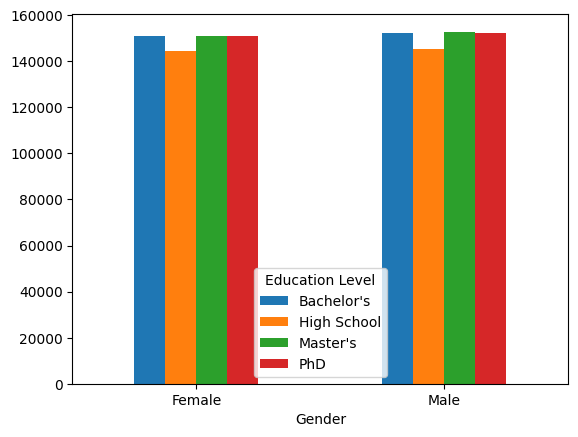

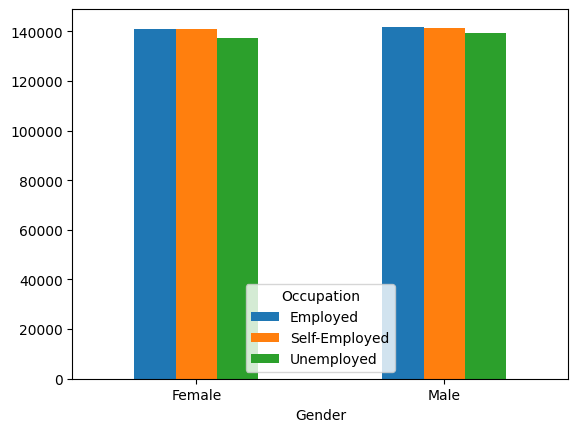

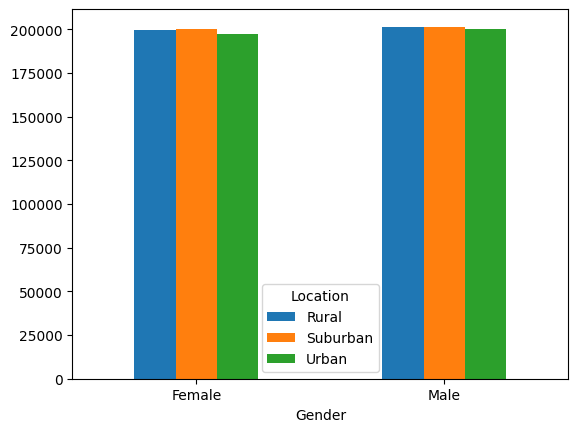

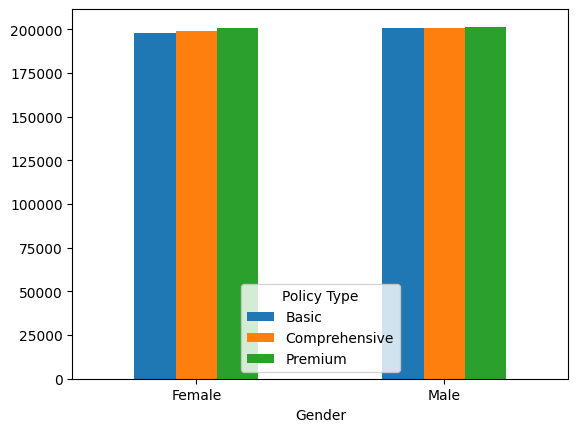

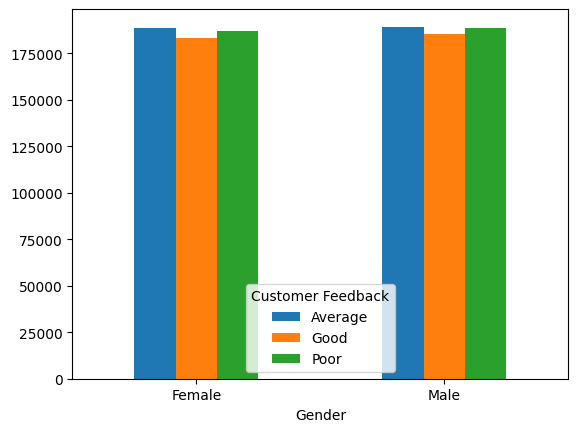

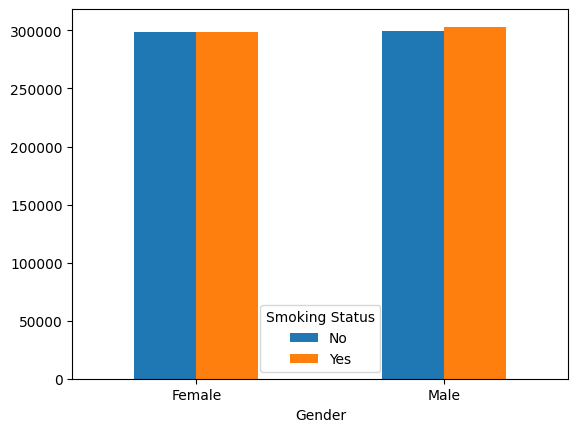

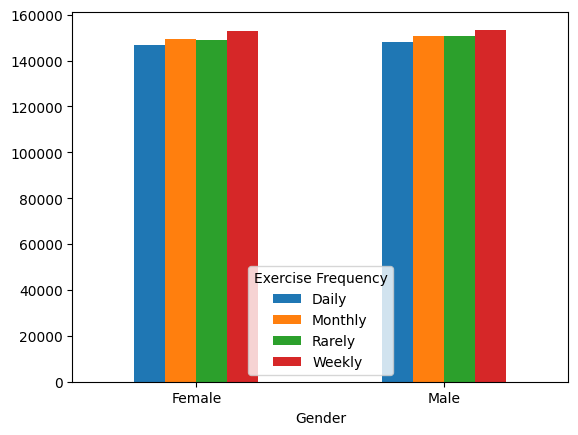

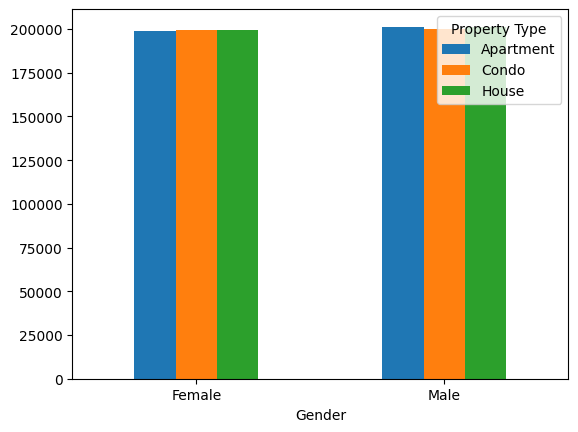

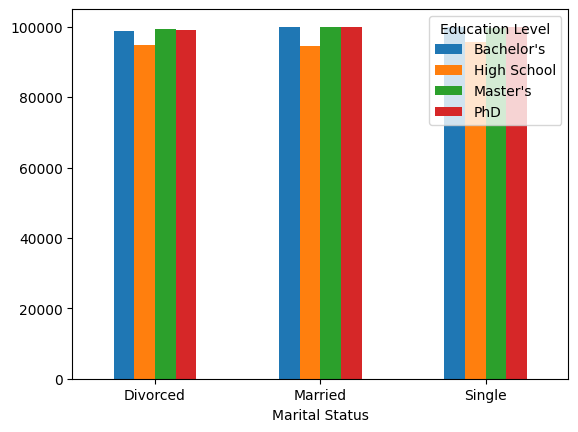

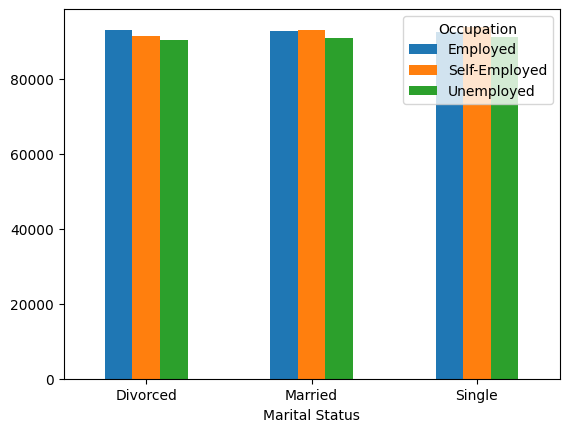

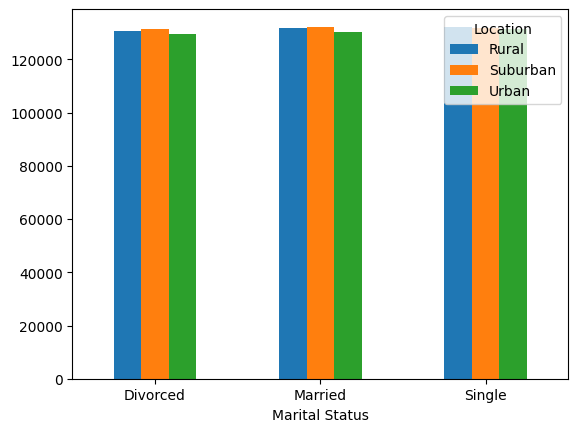

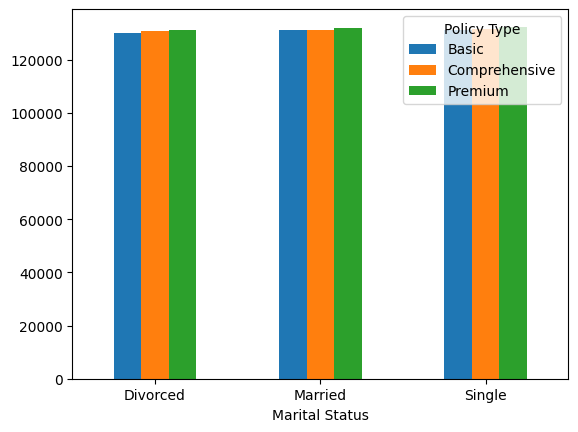

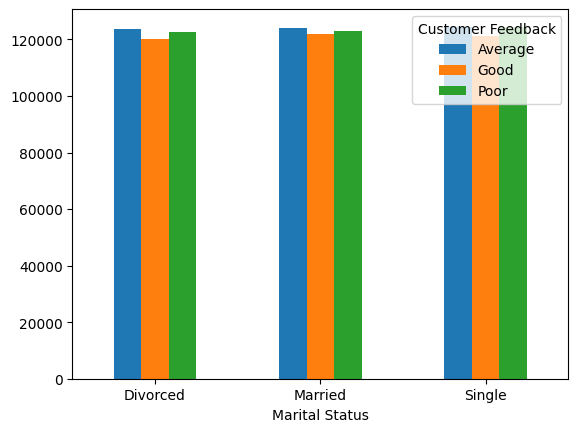

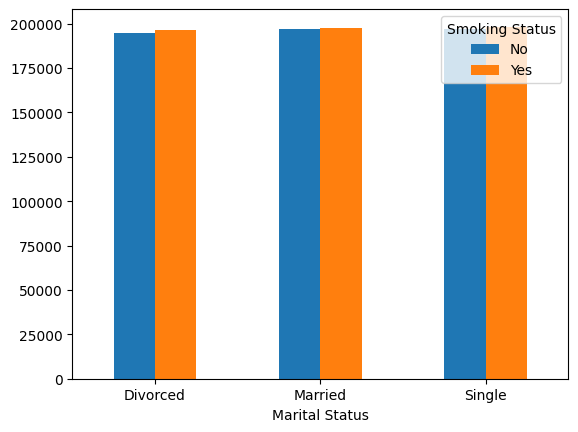

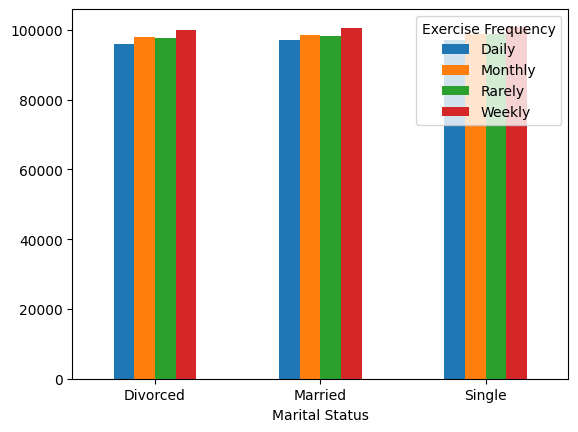

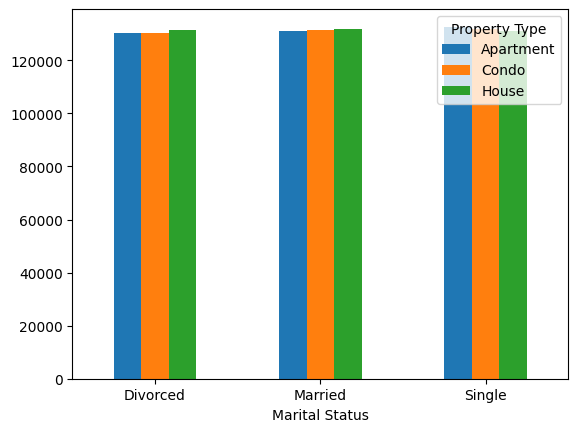

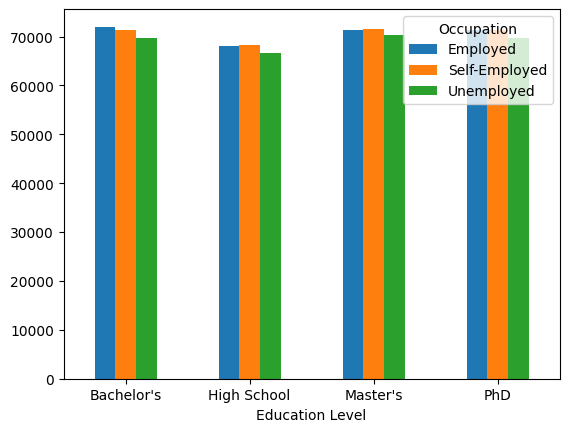

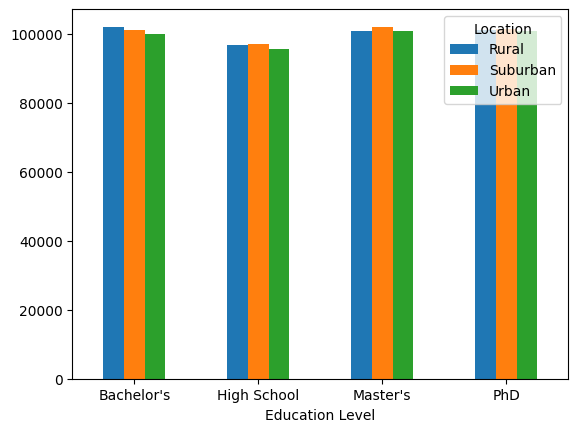

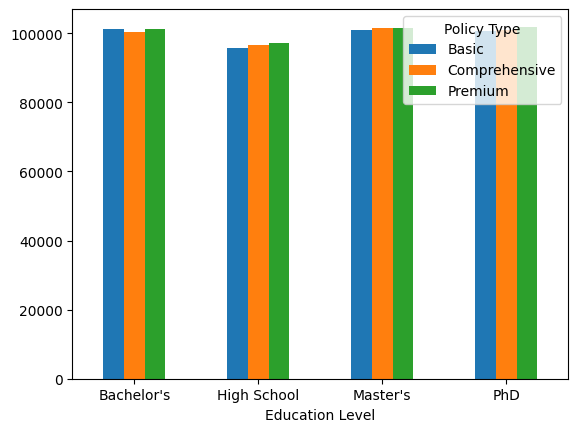

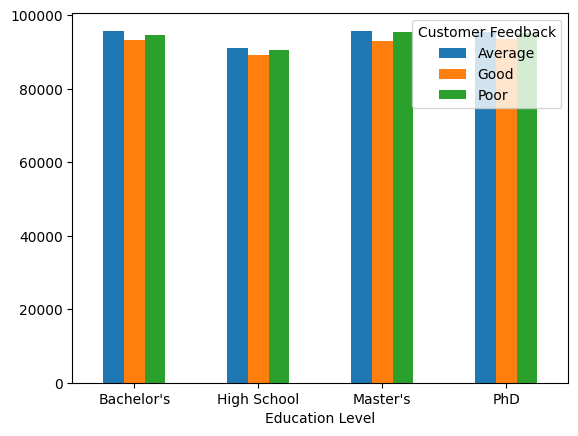

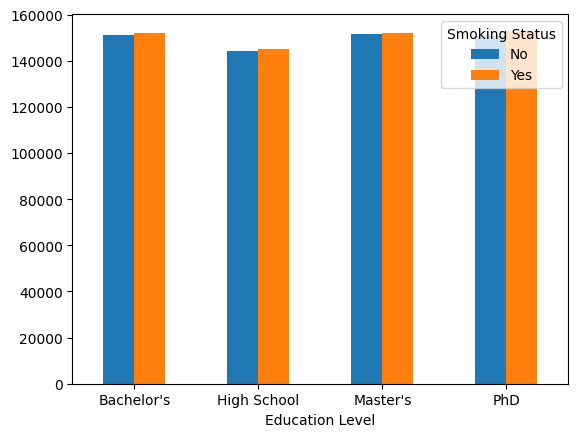

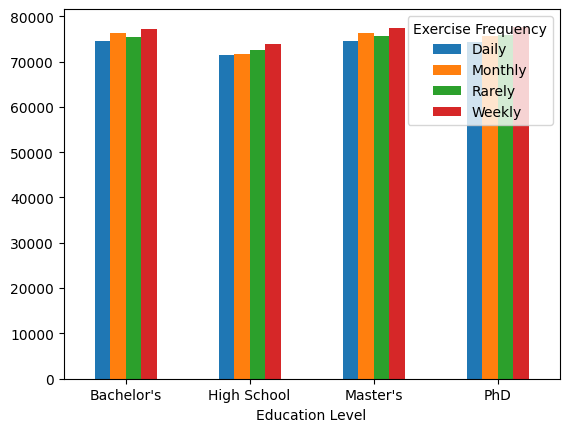

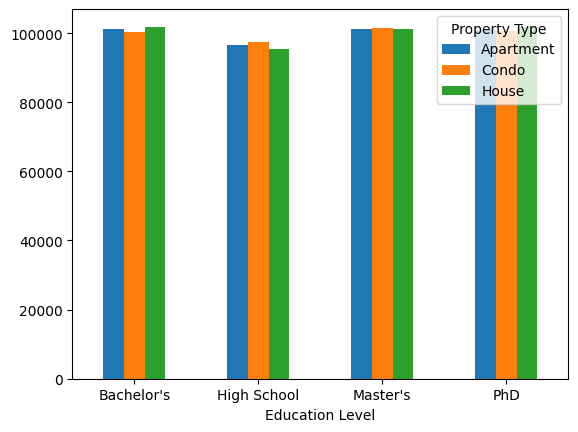

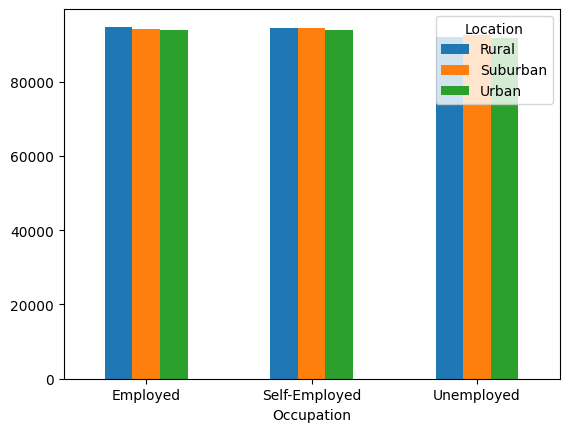

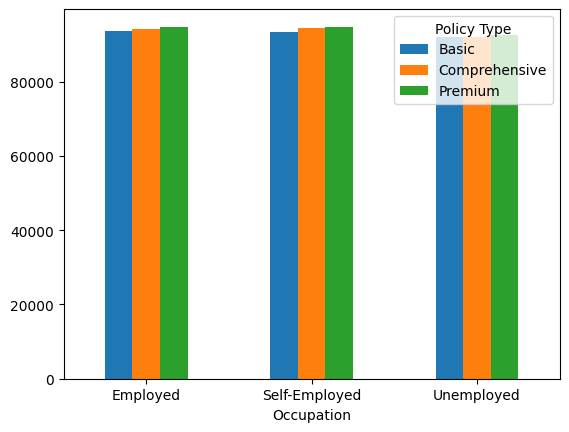

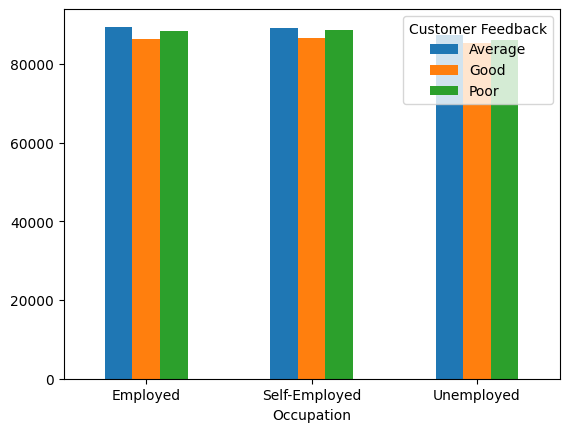

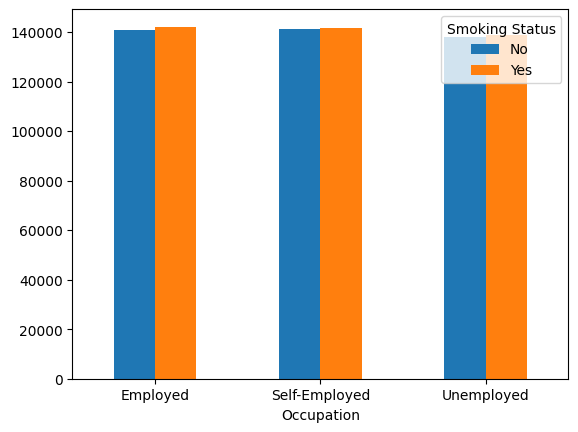

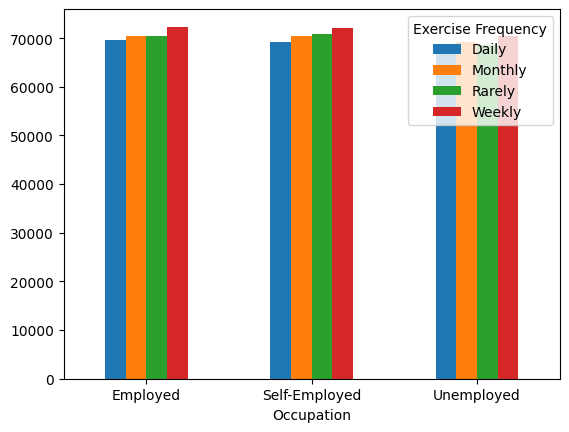

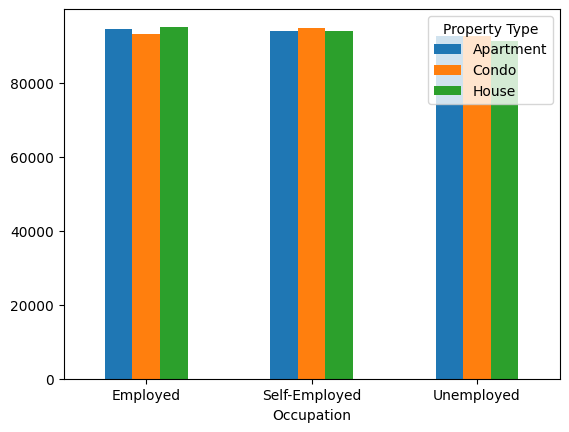

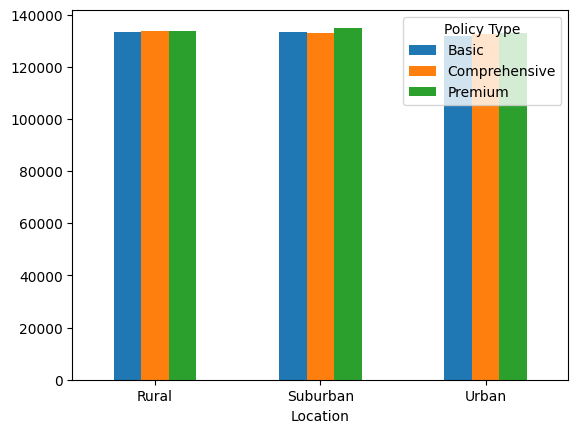

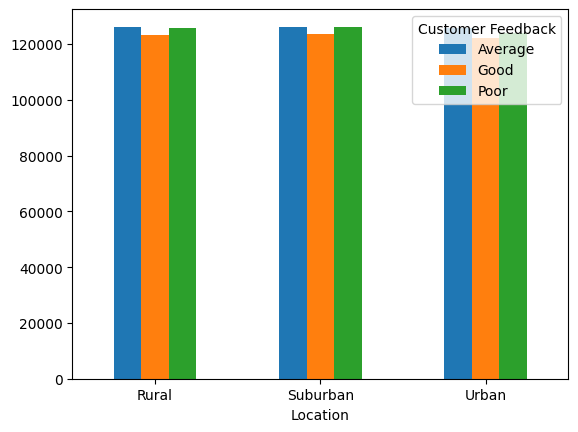

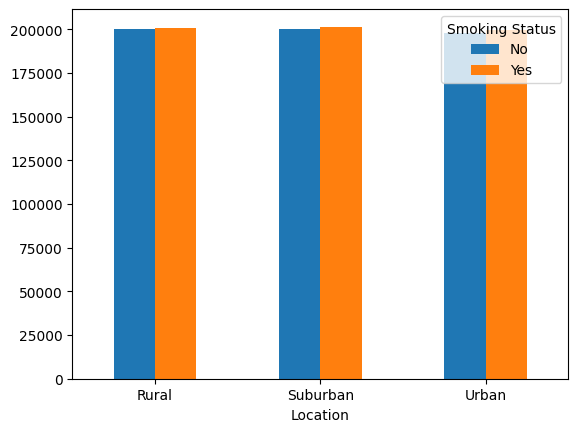

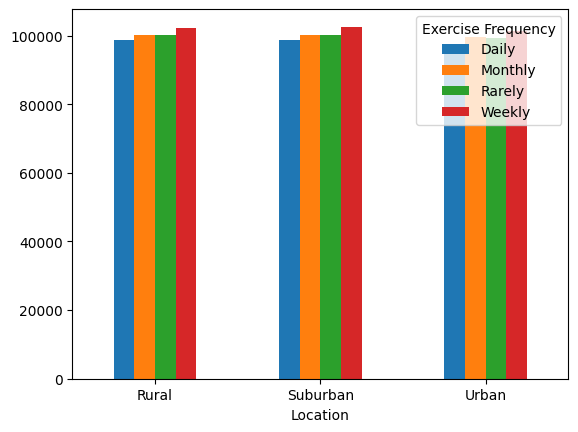

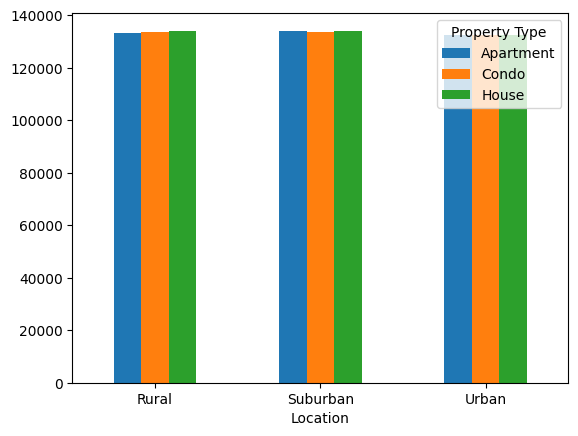

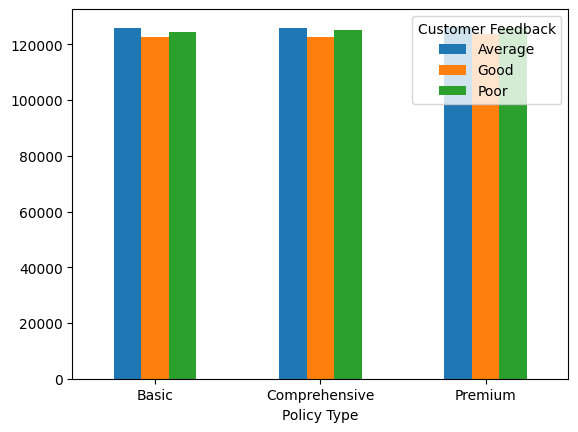

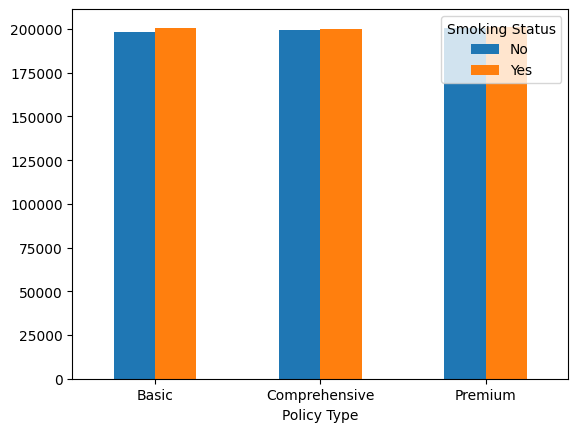

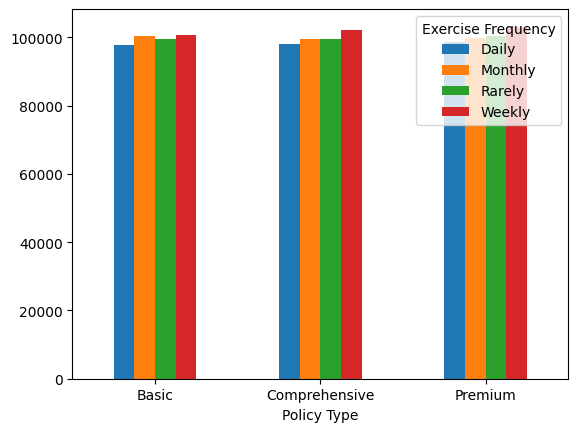

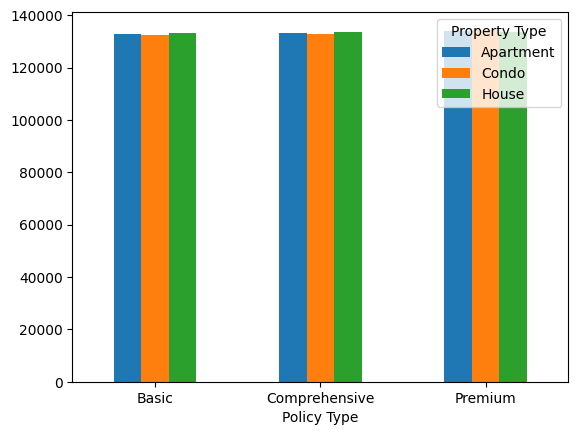

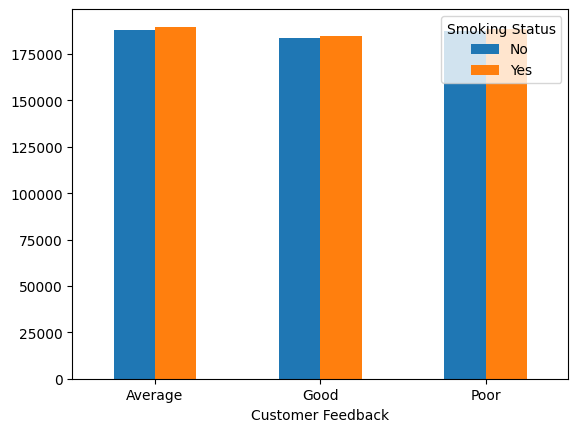

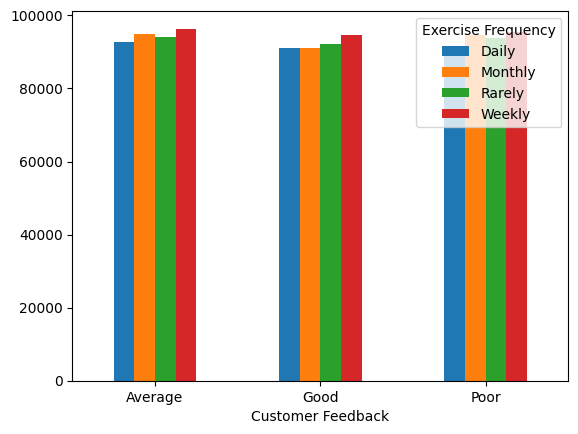

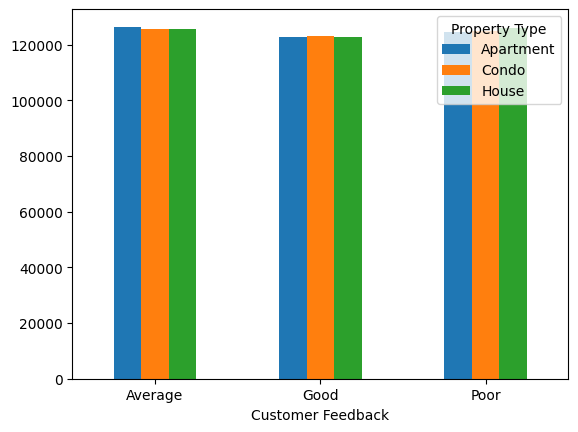

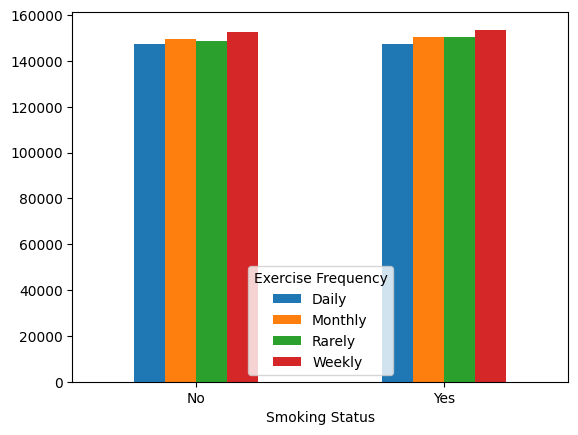

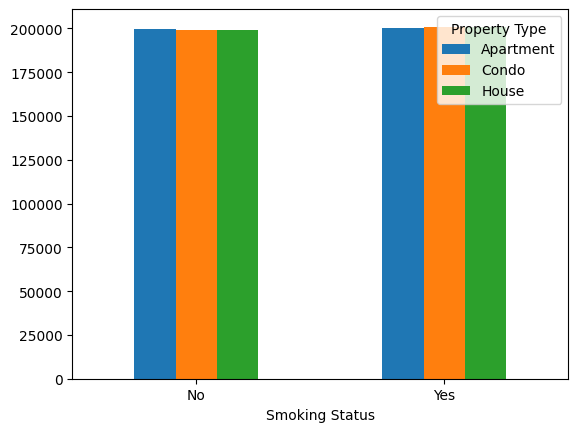

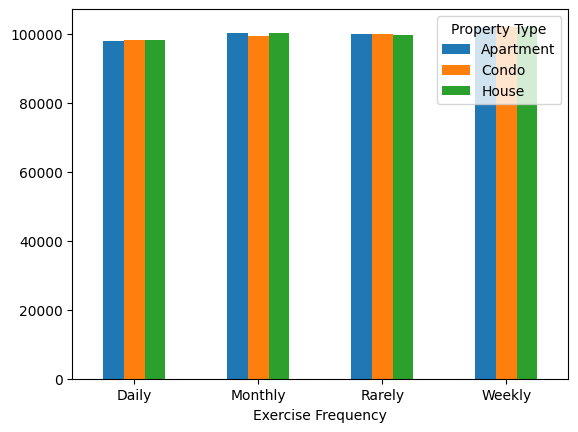

In [10]:
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        if data[categorical_features[i]].nunique() < 10 and data[categorical_features[j]].nunique() < 10: #Avoid huge tables
            contingency_table = pd.crosstab(data[categorical_features[i]], data[categorical_features[j]])
            #print(f"Contingency Table: {categorical_features[i]} vs {categorical_features[j]}\n{contingency_table}\n")
            # Creating barplot
            barplot = contingency_table.plot.bar(rot=0)


#### Target variable

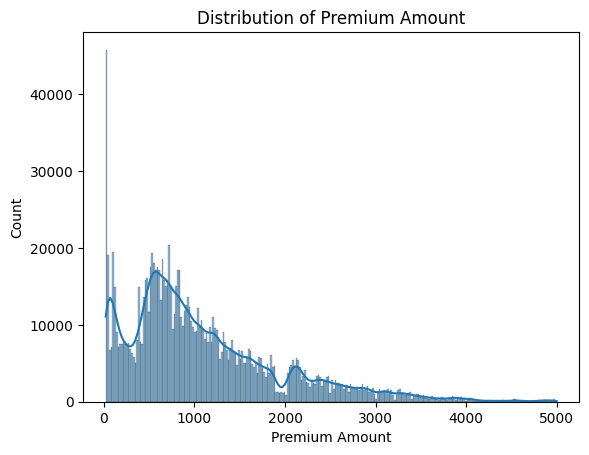

In [12]:
sns.histplot(data['Premium Amount'], kde=True)
plt.title("Distribution of Premium Amount")
plt.show()

<Axes: xlabel='Premium Amount', ylabel='Density'>

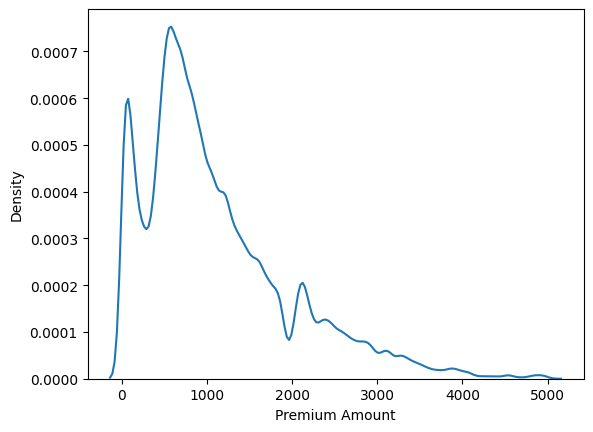

In [13]:
sns.kdeplot(data['Premium Amount'])

Features vs Target

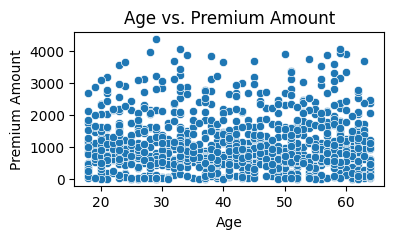

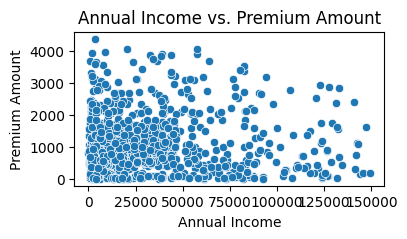

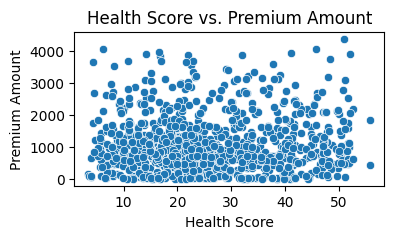

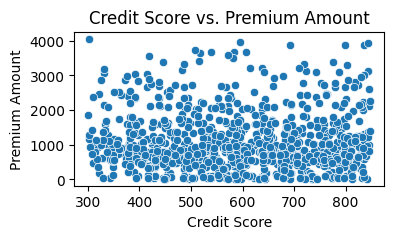

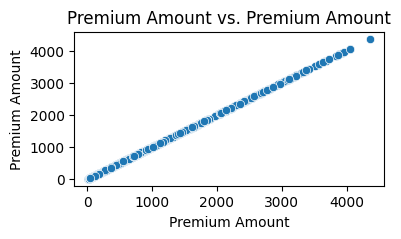

In [14]:
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.scatterplot(x=data[feature].head(1000), y=data['Premium Amount'].head(1000))
    plt.title(f"{feature} vs. Premium Amount")
    plt.show()

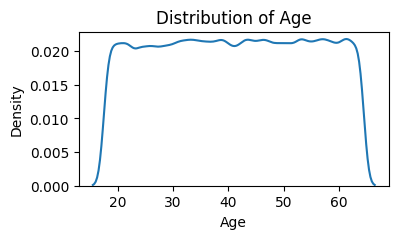

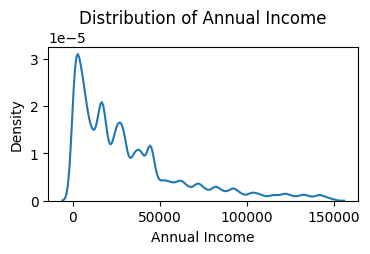

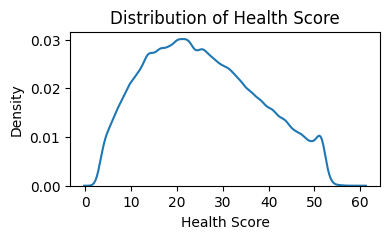

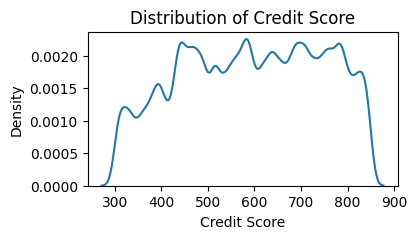

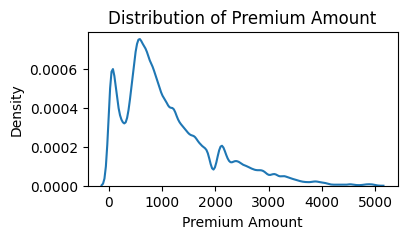

In [15]:
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.kdeplot(data[feature])
    plt.title(f"Distribution of {feature}")
    plt.show()

Check if occupation property type influences premium amount

In [ ]:
df_test=